In [1]:
import numpy as np
import torch
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [2]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [3]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [4]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.7538, -0.6834, -0.3002],
        [-0.2678,  0.4208,  0.6625]], requires_grad=True)
tensor([ 1.4906, -0.3987], requires_grad=True)


In [5]:
def model(x):
    return x @ w.t() + b

In [6]:

preds = model(inputs)
print(preds)

tensor([[-112.2294,   36.7314],
        [-146.4521,   54.6597],
        [-173.0719,   71.1141],
        [-115.8865,   14.8899],
        [-137.1372,   67.8933]], grad_fn=<AddBackward0>)


In [7]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [9]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [10]:
loss = mse(preds, targets)
print(loss)

tensor(25220.4961, grad_fn=<DivBackward0>)


In [11]:
loss.backward()

In [12]:
print(w)
print(w.grad)

tensor([[-0.7538, -0.6834, -0.3002],
        [-0.2678,  0.4208,  0.6625]], requires_grad=True)
tensor([[-17804.6055, -19881.4160, -12128.4746],
        [ -3562.2463,  -4091.3242,  -2476.2495]])


In [13]:

w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [16]:

preds = model(inputs)
print(preds)

tensor([[-112.2294,   36.7314],
        [-146.4521,   54.6597],
        [-173.0719,   71.1141],
        [-115.8865,   14.8899],
        [-137.1372,   67.8933]], grad_fn=<AddBackward0>)


In [15]:
loss = mse(preds, targets)
print(loss)

tensor(25220.4961, grad_fn=<DivBackward0>)


In [17]:

loss.backward()
print(w.grad)
print(b.grad)

tensor([[-17804.6055, -19881.4160, -12128.4746],
        [ -3562.2463,  -4091.3242,  -2476.2495]])
tensor([-213.1554,  -42.9423])


In [18]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [19]:
print(w)
print(b)

tensor([[-0.5757, -0.4846, -0.1789],
        [-0.2322,  0.4617,  0.6872]], requires_grad=True)
tensor([ 1.4927, -0.3983], requires_grad=True)


In [20]:

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(17071.8457, grad_fn=<DivBackward0>)


In [21]:

l1=[]
for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    l1.append(loss.cpu().detach().numpy())
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [22]:
w

tensor([[-0.3880,  0.8847,  0.5830],
        [-0.2902,  0.8081,  0.8771]], requires_grad=True)

In [23]:
b

tensor([ 1.4987, -0.3977], requires_grad=True)

In [24]:

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(1.1177, grad_fn=<DivBackward0>)


In [25]:
preds

tensor([[ 57.5118,  70.2785],
        [ 81.3472, 100.4452],
        [120.0957, 133.5180],
        [ 21.5297,  37.2038],
        [100.4586, 118.5580]], grad_fn=<AddBackward0>)

In [26]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [27]:
w

tensor([[-0.3880,  0.8847,  0.5830],
        [-0.2902,  0.8081,  0.8771]], requires_grad=True)

In [28]:
b

tensor([ 1.4987, -0.3977], requires_grad=True)

In [29]:
import matplotlib.pyplot as plt
type(l1)

list

In [30]:
l2=np.array(range(0,1000))
l1=np.array(l1)
l1
    

array([1.70718457e+04, 1.15796426e+04, 7.87758984e+03, 5.38190771e+03,
       3.69919385e+03, 2.56433740e+03, 1.79868628e+03, 1.28184863e+03,
       9.32693665e+02, 6.96548340e+02, 5.36569763e+02, 4.27929382e+02,
       3.53895569e+02, 3.03192810e+02, 2.68222961e+02, 2.43865204e+02,
       2.26668869e+02, 2.14308517e+02, 2.05216522e+02, 1.98336716e+02,
       1.92957184e+02, 1.88598145e+02, 1.84935822e+02, 1.81752289e+02,
       1.78900360e+02, 1.76280792e+02, 1.73826553e+02, 1.71492508e+02,
       1.69247910e+02, 1.67072220e+02, 1.64951157e+02, 1.62875198e+02,
       1.60837708e+02, 1.58834351e+02, 1.56861786e+02, 1.54917877e+02,
       1.53001022e+02, 1.51109985e+02, 1.49243896e+02, 1.47402130e+02,
       1.45584091e+02, 1.43789230e+02, 1.42017273e+02, 1.40267731e+02,
       1.38540375e+02, 1.36834808e+02, 1.35150726e+02, 1.33487839e+02,
       1.31845978e+02, 1.30224808e+02, 1.28624008e+02, 1.27043419e+02,
       1.25482666e+02, 1.23941574e+02, 1.22419823e+02, 1.20917336e+02,
      

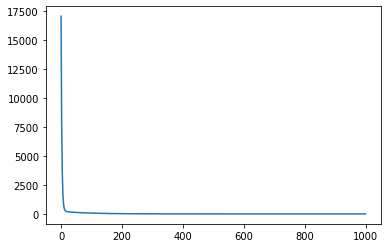

In [31]:
plt.plot(l2,l1)

In [32]:
import torch.nn as nn
     

inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
     

inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [37]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, targets)


In [38]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1879,  0.0367, -0.1915],
        [ 0.0135, -0.1918,  0.1409]], requires_grad=True)
Parameter containing:
tensor([-0.4280,  0.5364], requires_grad=True)


In [39]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1879,  0.0367, -0.1915],
         [ 0.0135, -0.1918,  0.1409]], requires_grad=True),
 Parameter containing:
 tensor([-0.4280,  0.5364], requires_grad=True)]

In [40]:
preds = model(inputs)
preds

tensor([[-19.9134,  -5.2670],
        [-26.5442,  -6.0918],
        [-22.9543, -15.8129],
        [-25.0940,  -1.1186],
        [-23.2663,  -7.0774],
        [-19.9134,  -5.2670],
        [-26.5442,  -6.0918],
        [-22.9543, -15.8129],
        [-25.0940,  -1.1186],
        [-23.2663,  -7.0774],
        [-19.9134,  -5.2670],
        [-26.5442,  -6.0918],
        [-22.9543, -15.8129],
        [-25.0940,  -1.1186],
        [-23.2663,  -7.0774]], grad_fn=<AddmmBackward0>)

In [41]:
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(11226.8301, grad_fn=<MseLossBackward0>)


In [43]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
     

def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
     



In [45]:
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [103., 119.],
        [ 81., 101.],
        [ 22.,  37.]])


In [47]:
mino = []
mino= fit(1000, model, loss_fn, opt, train_dl)

Epoch [10/1000], Loss: 88.8798
Epoch [20/1000], Loss: 274.9337
Epoch [30/1000], Loss: 134.4008
Epoch [40/1000], Loss: 45.6321
Epoch [50/1000], Loss: 68.4550
Epoch [60/1000], Loss: 55.4593
Epoch [70/1000], Loss: 67.3587
Epoch [80/1000], Loss: 20.2110
Epoch [90/1000], Loss: 3.2695
Epoch [100/1000], Loss: 32.1131
Epoch [110/1000], Loss: 30.2605
Epoch [120/1000], Loss: 16.3601
Epoch [130/1000], Loss: 16.4128
Epoch [140/1000], Loss: 14.9554
Epoch [150/1000], Loss: 11.7849
Epoch [160/1000], Loss: 5.9870
Epoch [170/1000], Loss: 9.0409
Epoch [180/1000], Loss: 2.3578
Epoch [190/1000], Loss: 4.5263
Epoch [200/1000], Loss: 7.7308
Epoch [210/1000], Loss: 9.5807
Epoch [220/1000], Loss: 1.5705
Epoch [230/1000], Loss: 5.2111
Epoch [240/1000], Loss: 6.5662
Epoch [250/1000], Loss: 6.1113
Epoch [260/1000], Loss: 1.1711
Epoch [270/1000], Loss: 8.5281
Epoch [280/1000], Loss: 5.0919
Epoch [290/1000], Loss: 4.9586
Epoch [300/1000], Loss: 7.1098
Epoch [310/1000], Loss: 3.3073
Epoch [320/1000], Loss: 3.6993
E

In [48]:
preds = model(inputs)
preds

tensor([[ 57.1418,  70.4214],
        [ 82.0588, 100.4537],
        [119.1990, 133.2878],
        [ 21.2399,  37.1036],
        [101.4769, 118.8146],
        [ 57.1418,  70.4214],
        [ 82.0588, 100.4537],
        [119.1990, 133.2878],
        [ 21.2399,  37.1036],
        [101.4769, 118.8146],
        [ 57.1418,  70.4214],
        [ 82.0588, 100.4537],
        [119.1990, 133.2878],
        [ 21.2399,  37.1036],
        [101.4769, 118.8146]], grad_fn=<AddmmBackward0>)

In [49]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])